# Week 3: Numerical Integration

<hr/>

## Today's Learning Objectives

- Implement the Euler Method for integrating exponential growth over time
- Explain the effect $\Delta t$ has on the quality of the approximation
- Explain what is meant by 'higher order' approximations, and be able to predict how they compare to the Euler method
- Implement one higher order approximation of exponential growth and compare it to the Euler method

## The Euler Method
Developing simple ways to solve ordinary differential equations has long been an area of intense research. While deriving the analytical solution may be simple in some cases, it is often useful to solve them numerically, especially if slamming out the analytical solution will give you carpal tunnel.

While there are many ways to numerically integrate these equations, in this tutorial we will examine the Forward Euler method. Say we have an ordinary differential equation such as

$$ \frac{dN}{dt}=kN(t) \tag{1}$$

as would be the case for exponential growth, where  $k$  is some growth-rate constant and  $t$  is time. Rather than solving this analytically (although it is not tricky to do so), we can solve it numerically by starting at some given value of  $N$, evaluating Equation (1) for a given time step $\Delta t$ , and updating the new value of  $N$  at this new time  $t+\Delta t$ . We can phrase this mathematically as

$$N(t+\Delta t)=N(t)+kN(t)\Delta t. \tag{2}$$

Say our initial value ( $N$  at  $t=0$ ) is  $N=10$  and  $k=1$. We can take a time step $\Delta t=0.1$  and find that the change in value of $N$  is

$$\Delta N=kN \Delta t=1.\tag{3}$$

We can then compute the new value of  $N$  at time  $t+\Delta t$  as

$$N(t+\Delta t)=N(t)+\Delta N=10+1=11.\tag{4}$$

We can then take another step forward in time and repeat the process for as long as we would like. As the total time we'd like to integrate over becomes large, it becomes obvious why using a computer is a far more attractive approach than scribbling it by hand.

A major point to be wary of is the instability of this method. The error in this scales with the square of our step size. We must choose a sufficiently small step in time such that at most only one computable event must occur. For example, if we are integrating exponential growth of bacterial cells, we don't want to take time steps larger than a cell division! This requirement is known as the Courant-Friedrichs-Lewy condition and is important for many different time-marching computer simulations.

In [2]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for pretty plots
import seaborn as sns
sns.set()

In order to numerically integrate Equation (1), we first need to specify a few parameters, such as the initial value of $N$, the growth rate $r$ , and the time step $\Delta t$.

In [26]:
# parameters for our ODE
N_0 = 1
k = 0.03 # min^-1

# parameters for our integration
dt = 10 # min
total_time = 120 # min

Now we can set up an array into which we can save our values of  $N$  as they increase with time, with the first value in the `N_t` array being set to `N_0` as specified above.

In [27]:
# determine the number of steps that will be taken
num_steps = int(total_time/dt)

# initilize an array of length num_steps into which to store values of N
N = np.zeros(num_steps)
N[0] = N_0

Now we can actually compute the numerical integration, by looping through the `N` array and filling in the values of `N` as we go. At each time point $N(t+\Delta t)=N(t)+kN(t) \Delta t$,  where  $t+\Delta t$  refers to the next entry in the `N` array.

In [28]:
# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N entry
    dN = N[t]*k*dt
    
    # update current N entry
    N[t+1] = N[t] + dN

And done! The numerical integration of more than a thousand time steps just happened nearly instantly, showing the immense value of using code to automate computational processes. Let's now plot the results. We currently have the  $N$  values to plot, we just need to specify the  $t$  values as well.

Text(0, 0.5, 'N')

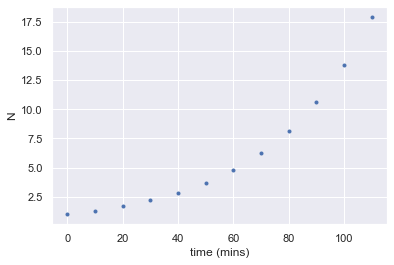

In [29]:
# make array of time values
times = np.arange(num_steps)*dt

# plot 
plt.plot(times,N,'.')
plt.xlabel("time (mins)")
plt.ylabel("N")

That certainly looks exponential! Let's plot the known solution of  $N(t)=N_0e^{kt}$  on top of our numerical integration for comparison.

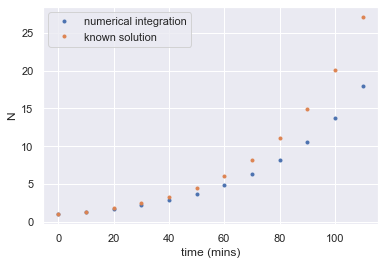

In [30]:
# compute the known solution
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times,N,'.')
plt.plot(times,soln,'.')
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])

Nice! Our numerical integration and the known solution are so similar that the two lines can't be distinguished from each other in the plot above. Recall how we said that picking a sufficiently small  $\Delta t$  is necessary for numerical integration to work? From here, it's worth while to see how the plot above changes for different values of `dt`. As `dt` increases, our numerical integration deviates more and more from the known solution, with our integration systematically underestimating the true values. This is because with exponential growth, the rate of growth is always increasing and taking too large of a time step fails to capture this increase.

## Improved Euler

As discussed in Chapter 2.8 of Stogatz and as we saw above, Euler can result in inaccuracies as $\Delta t$ becomes to larger. Another way to combat this, as opposed to just bringing down the value of $\Delta t$ is to try to improve the quality of our estimate. One way is to take the average over the interval we are looking at, acknowledging that the derivative at this value of $N(t)$ and the derivative at $N(t+\Delta t)$ will be different from each other. By averaging these two values, we can get a better estimate of the derivative over the interval we are looking at. Concretely what this looks like is first calculating our updated value for $N$ as

$$\tilde{N} (t+\Delta t)=N(t)+kN(t)\Delta t. \tag{5}$$

where the $\tilde{}$ indicated that this is just an initial guess of $N$ at $t+\Delta t$. Our final estimate of $N (t+\Delta t)$ will incorporate this value, and is defined as follows:

$$ N(t+\Delta t)=N(t)+ \frac{1}{2}[N(t)+\tilde{N}(t+\Delta t)]k\Delta t. \tag{6}$$

Below, update our code from before to incorporate this more nuanced version of the Euler method.

In [31]:
# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N_t entry
    dN = N[t]*k*dt
    
    # initial guess at N, using normal Euler's
    N_guess = N[t] + dN
    
    # final approximation for the new value of N
    N_new = N[t] + 0.5*(N[t]+N_guess)*k*dt
    
    # update the N array
    N[t+1] = N_new

How do the plots compare this time? Does it seem like this "improved" Euler actually helped?

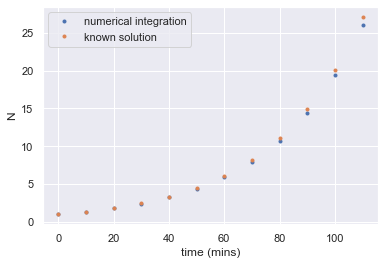

In [32]:
# compute the known solution
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times,N,'.')
plt.plot(times,soln,'.')
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])

## Fourth-Order Runge-Kutta Method

Lastly, an even more nuanced approximation would incorporate even more points, such as the fourth-order Runge-Kutta method. Here we start to see the trade-off between the number of calculations required and the quality of the approximation. While Runge-Kutta will perform better the the Euler method, it requires a total of five calculations for every time step. For this problem, the additional computation won't be that noticeable, but this may be something you have to consider for more complicated problems. 

In general for a differential equation $f(x)$, the approximation for $x$ at time $t + \Delta t$ is computed as follows


$$k_1=f\left(x_t\right) \Delta t$$

$$k_2=f\left(x_t+\frac{1}{2} k_1\right) \Delta t $$

$$k_3=f\left(x_t+\frac{1}{2} k_2\right) \Delta t$$

$$k_4=f\left(x_t+k_3\right) \Delta t $$

$$x_{t+\Delta t} = x_t + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$.

Once again, let's update our integration from before to compute this more precise approximation. How does this fourth-order approximation compare to the Euler method? How about the improved Euler method? 

In [9]:
# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # FILL IN THE REST HERE
    N[t] = N_0

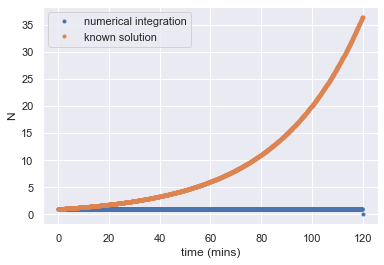

In [10]:
# compute the known solution
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times,N,'.')
plt.plot(times,soln,'.')
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["numerical integration", "known solution"])